In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy import units as u

In [4]:
from astropy.io import fits
from astropy.time import Time
import math

In [5]:
## Orbital ephemeris from Islam and Paul 2016
orb_epoch = 49149.412 ## units MJD
Porb_0 = 3.411660 ## unit days D
Porb_rch = -4.7E-7 ## unit yrs^-1
Porb_rch *= 1/365.242374 ## units D^-1

def phicon_and_porb(start):
    
    time_since_epoch = start - orb_epoch

    Porb_current = Porb_0 + (time_since_epoch*Porb_rch)
    orbs_since_epoch = math.floor(time_since_epoch/Porb_current)
    mjd_last_orb = orb_epoch + Porb_current*orbs_since_epoch
    
    phi_start = (start - mjd_last_orb)/Porb_current
    
    return (phi_start, Porb_current)

In [6]:
## Convert time (s) to orbital phase phi_start and Porb_current 
def s_to_phi(t): # t units (s); ps unitless phi; pc units (days)
    phi = ps + (t/(pc*86400))#%1 ## no need for this to be modulo with t(s) priority
    return phi

## Convert orbital phase to time (s) given phi_start and Porb_current
def phi_to_s(phi): 
    t = (pc*86400)*(phi-ps)
    return t

In [12]:
## Ideally I would write a few lines of code to get the obs start time automatically,
## But since this is just one observation, I am just going to grab it myself:
## Obs starts at: '2025-02-10T11:46:04'
ost = Time('2025-02-10T11:46:04', format='isot', scale='utc').mjd
oen = Time('2025-02-11T22:09:04', format='isot', scale='utc').mjd
ps, pc = phicon_and_porb(ost)

In [15]:
print(f'XRISM Obs. begins at $\phi$ = {phicon_and_porb(ost)[0]}')
print(f'XRISM Obs. ends   at $\phi$ = {phicon_and_porb(oen)[0]}')

XRISM Obs. begins at $\phi$ = 0.46938740309189836
XRISM Obs. ends   at $\phi$ = 0.8893153533129494


In [2]:
lc = Table.read(f"xa201064010_allpix_b128_lc.fits")

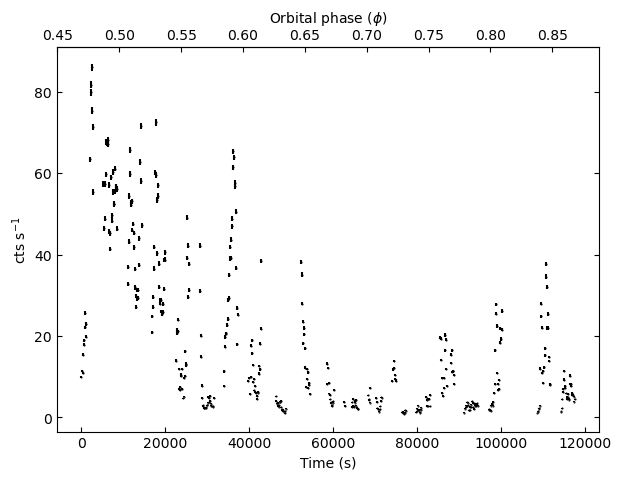

In [16]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

ax.errorbar(x=lc["TIME"], y=lc["RATE"],
            yerr=lc["ERROR"], 
            marker='.', ls='none', markersize=1, color='k')

secax = ax.secondary_xaxis(location='top', functions=(s_to_phi, phi_to_s))

ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='both', direction='in', which='major')
secax.tick_params(axis='both', direction='in', which='major')

ax.set_xlabel("Time (s)")
ax.set_ylabel("cts s$^{-1}$")
secax.set_xlabel("Orbital phase ($\phi$)")

#plt.savefig('xa201064010_2to12keV_lc.eps', bbox_inches='tight')

plt.show()